In [10]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import thinkplot
import thinkstats2
%matplotlib inline

In [11]:
df_hist_price = pd.read_csv("NFLX.csv")
df_hist_price['date'] = pd.to_datetime(df_hist_price['date'])
df_hist_price = df_hist_price[(df_hist_price['date']> "2010-01-01")]

In [12]:
df_vix = pd.read_csv("VIX.csv")
df_vix.rename(columns={"Date":"date"})
df_vix.rename(columns={'Date':'date','Open':'vix_open','Close':'vix_close','High':'vix_high','Low':'vix_low'}, inplace=True)
df_vix['date'] = pd.to_datetime(df_vix['date'])
df_vix['vix_dailyLag'] = df_vix['vix_close'].shift(1)
df_vix['vix_changePercent'] = ((df_vix['vix_dailyLag']/df_vix['vix_close']) -1)*100

In [13]:
df_data = (pd.merge(df_hist_price, df_vix, on='date'))

In [14]:
df_data['weekly Lag'] = df_data['close'].shift(7)
df_data['changePercentweekly'] = ((df_data['weekly Lag']/df_data['close']) -1)*100


In [15]:
final_df = df_data[["date", "open","close", "high","low", "volume","changePercent", "changePercentweekly","vix_open","vix_close","vix_changePercent"]]
final_df = final_df.drop_duplicates(subset=['date'], keep='last')
final_df = final_df.round({'changePercent': 0, 'changePercentweekly': 0, 'vix_changePercent': 0})
final_df.tail()

,date,open,close,high,low,volume,changePercent,changePercentweekly,vix_open,vix_close,vix_changePercent
2728,2020-11-03,487.72,493.42,496.77,502.23,3705755,1.0,2.0,36.439999,35.549999,4.0
2729,2020-11-04,519.56,514.29,519.15,517.69,5379231,2.0,-2.0,36.790001,29.570000,20.0
2730,2020-11-05,509.00,522.69,524.87,509.57,5612672,4.0,-6.0,27.559999,27.580000,7.0
2732,2020-11-06,534.00,532.17,515.33,522.92,4421024,0.0,-5.0,27.870001,24.860001,11.0
2733,2020-11-09,500.63,479.40,502.58,468.72,10803678,-9.0,3.0,24.799999,25.750000,-3.0


(array([733042., 733773., 734503., 735234., 735964., 736695., 737425.,
        738156.]),
 <a list of 8 Text major ticklabel objects>)

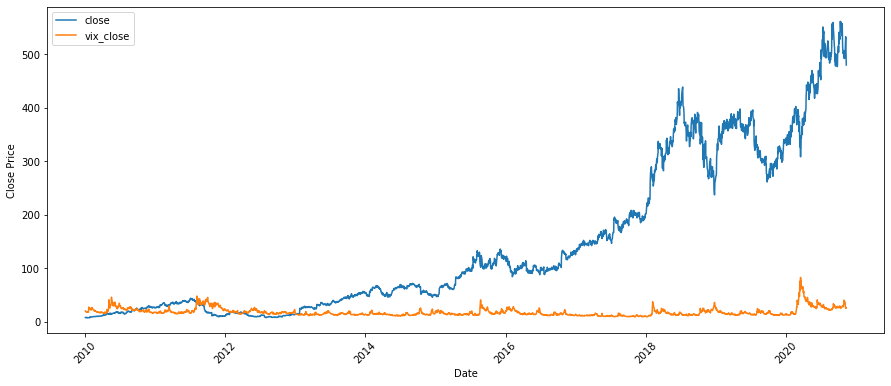

In [16]:
plt.figure(figsize=(15,6))
plt.plot('date','close',data=final_df)
plt.plot('date','vix_close',data=final_df)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

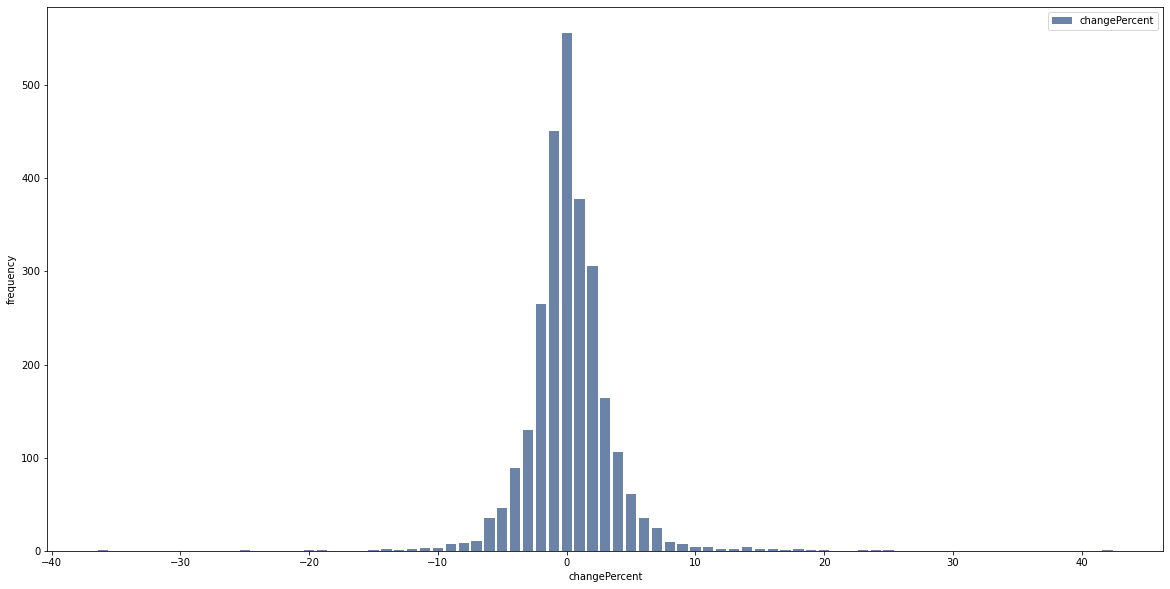

<Figure size 576x432 with 0 Axes>

In [20]:
plt.figure(figsize=(20,10))
hist_changePercent = thinkstats2.Hist(final_df.changePercent, label='changePercent')
thinkplot.Hist(hist_changePercent,width= .8)
thinkplot.Show(xlabel='changePercent', ylabel='frequency')

checking outliers

In [90]:
for pct_cng, freq in hist_changePercent.Smallest(5):
    print(pct_cng, freq)

-36.0 1
-25.0 1
-20.0 1
-19.0 1
-15.0 1


In [91]:
for pct_cng, freq in hist_changePercent.Largest(5):
    print(pct_cng, freq)

42.0 1
25.0 1
24.0 1
23.0 1
20.0 1


In [86]:
final_df_vixGE20 = final_df[final_df.vix_close >= 20]
final_df_vixLT20 = final_df[final_df.vix_close < 20]
vixGE20_hist = thinkstats2.Hist(final_df_vixGE20.changePercent)
vixLT20_hist = thinkstats2.Hist(final_df_vixLT20.changePercent)

No handles with labels found to put in legend.


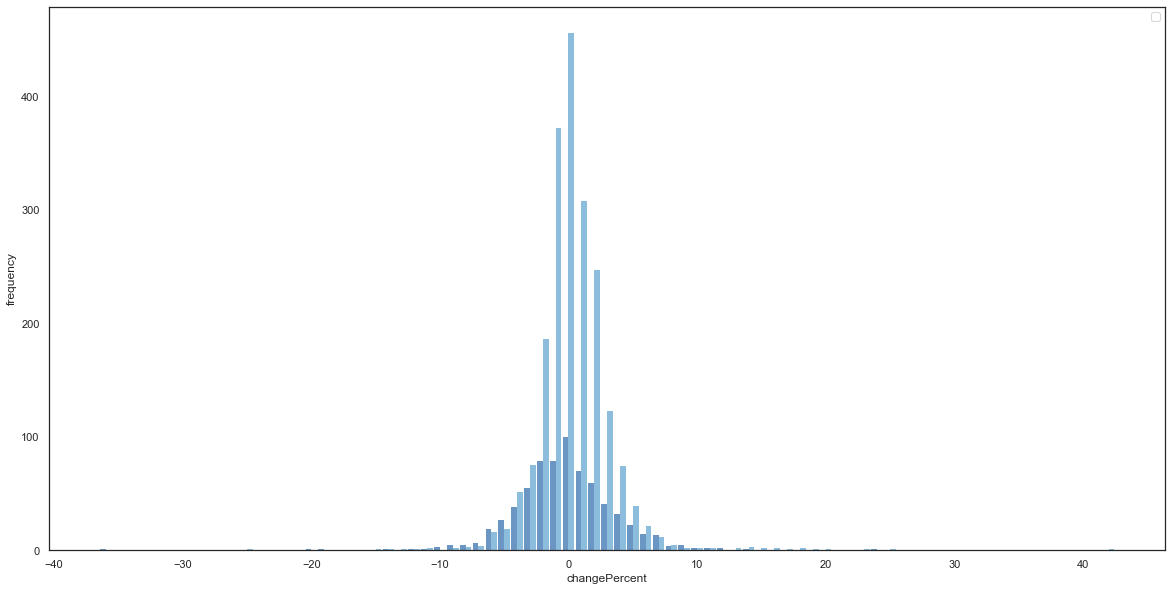

<Figure size 576x432 with 0 Axes>

In [96]:
plt.figure(figsize=(20,10))
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(vixGE20_hist, align='right', width=width)
thinkplot.Hist(vixLT20_hist, align='left', width=width)
thinkplot.Show(xlabel='changePercent', ylabel='frequency')

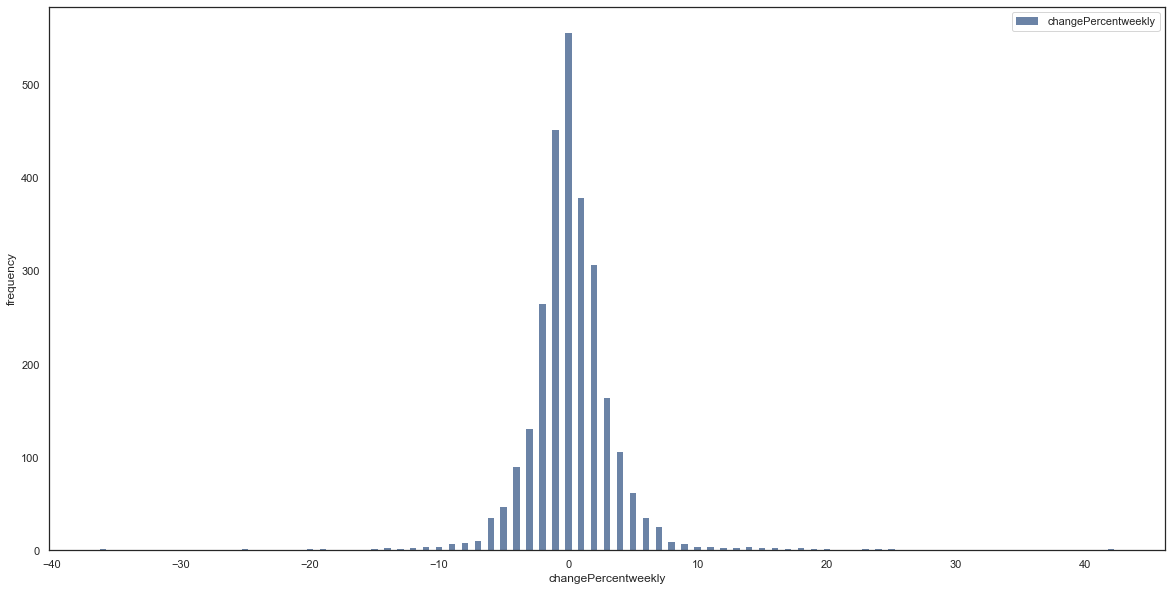

<Figure size 576x432 with 0 Axes>

In [97]:
plt.figure(figsize=(20,10))
hist_changePercentweekly = thinkstats2.Hist(final_df.changePercent, label='changePercentweekly')
thinkplot.Hist(hist_changePercentweekly,width= .5)
thinkplot.Show(xlabel='changePercentweekly', ylabel='frequency')

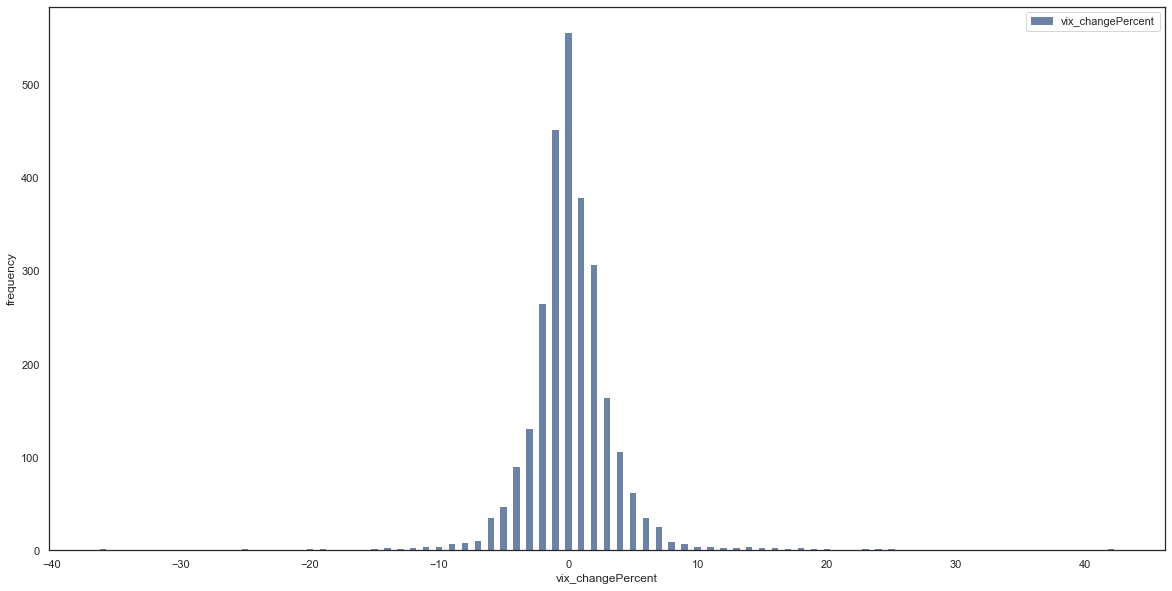

<Figure size 576x432 with 0 Axes>

In [98]:

plt.figure(figsize=(20,10))
hist_vix_changePercent = thinkstats2.Hist(final_df.changePercent, label='vix_changePercent')
thinkplot.Hist(hist_vix_changePercent,width= .5)
thinkplot.Show(xlabel='vix_changePercent', ylabel='frequency')

In [106]:
mean = final_df.close.mean()
print(mean)
var = final_df.close.var()
print(var)
std = final_df.close.std()
print(std)
median = final_df.close.median()
print(median)

144.6604500548846
21169.32548995111
145.49682295483674
90.26


In [110]:
mean = final_df.changePercent.mean()
print(mean)
var = final_df.changePercent.var()
print(var)
std = final_df.changePercent.std()
print(std)
median = final_df.changePercent.median()
print(median)
kurtosis = final_df.changePercent.kurtosis()
print(kurtosis)

0.21295279912184412
11.256977112339994
3.3551418915360336
0.0
21.08696165666787


In [114]:
vixGE20_pmf = thinkstats2.Pmf(final_df_vixGE20.changePercent, label='vixGE20')
vixLT20_pmf = thinkstats2.Pmf(final_df_vixLT20.changePercent, label='vixLT20')

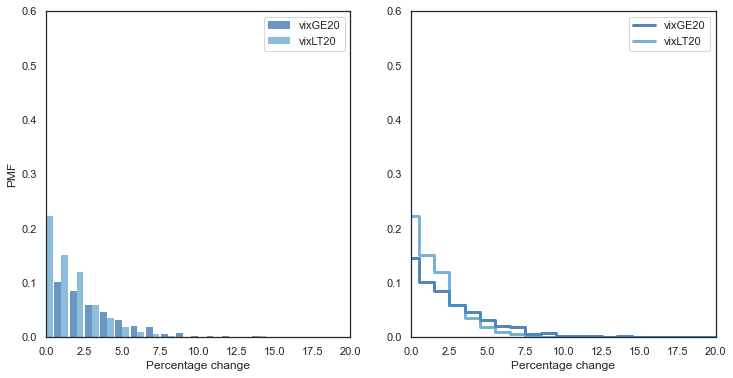

In [117]:
width=0.45
axis = [0,20, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(vixGE20_pmf, align='right', width=width)
thinkplot.Hist(vixLT20_pmf, align='left', width=width)
thinkplot.Config(xlabel='Percentage change', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([vixGE20_pmf, vixLT20_pmf])
thinkplot.Config(xlabel='Percentage change', axis=axis)

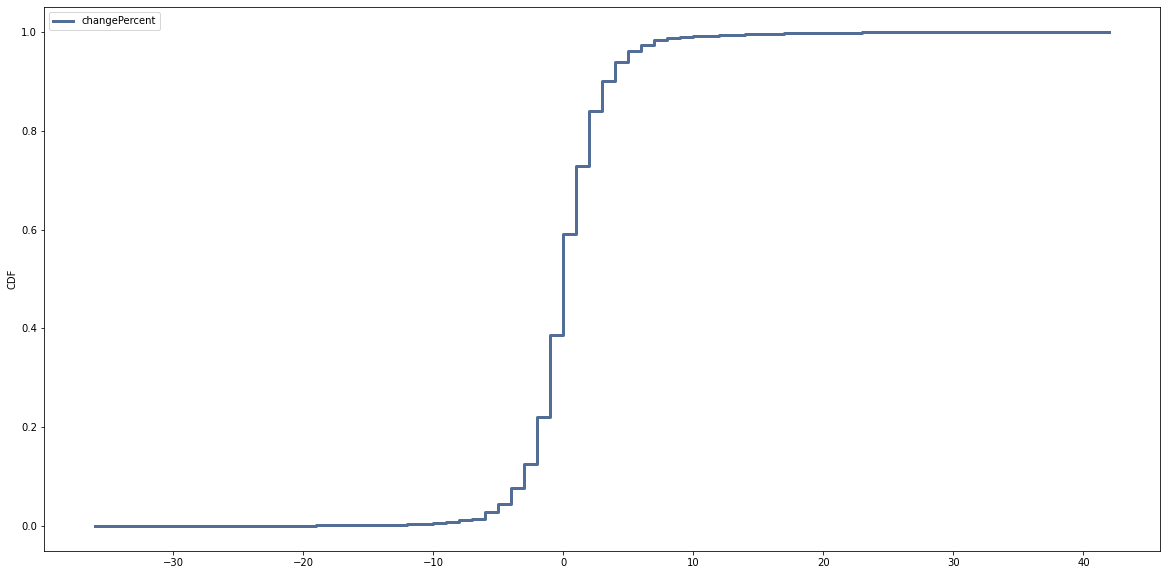

In [21]:
plt.figure(figsize=(20,10))
cdf = thinkstats2.Cdf(final_df.changePercent, label='changePercent')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='', ylabel='CDF', loc='upper left')

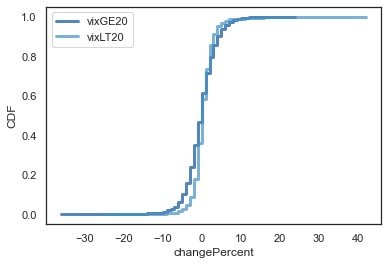

In [119]:
vixGE20_cdf = thinkstats2.Cdf(final_df_vixGE20.changePercent, label='vixGE20')
vixLT20_cdf = thinkstats2.Cdf(final_df_vixLT20.changePercent, label='vixLT20')

thinkplot.PrePlot(2)
thinkplot.Cdfs([vixGE20_cdf, vixLT20_cdf])
thinkplot.Config(xlabel='changePercent', ylabel='CDF')

Mean, Var 0.1799178798058977 6.458111079482455
Sigma 2.541281385341351


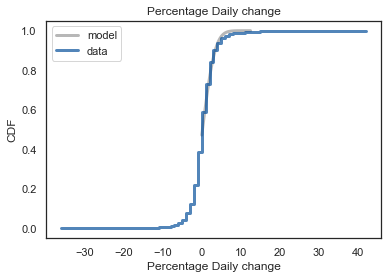

In [122]:
pct_chg = final_df.changePercent.dropna()
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(pct_chg, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(pct_chg, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Percentage Daily change',
                 xlabel='Percentage Daily change',
                 ylabel='CDF')

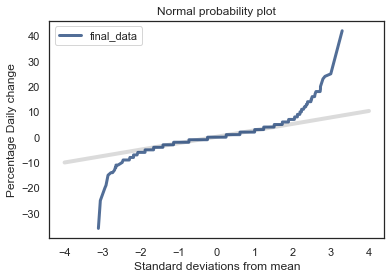

In [125]:
mean, var = thinkstats2.TrimmedMeanVar(pct_chg, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(pct_chg)
thinkplot.Plot(xs, ys, label='final_data')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Percentage Daily change')

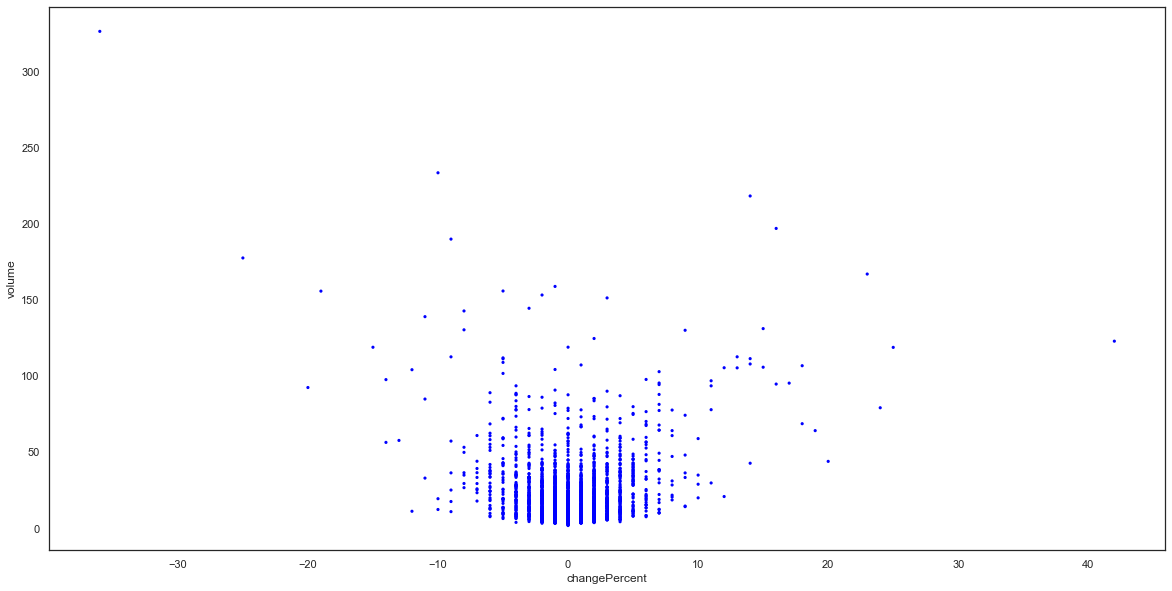

In [149]:
plt.figure(figsize=(20,10))
thinkplot.Scatter(final_df.changePercent,final_df.volume/1000000, alpha=1, s=10)
thinkplot.Config(xlabel='changePercent',
                 ylabel='volume',
                 #axis=[30,-30,0,2],
                 legend=False)

In [153]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

Corr(final_df.changePercent,final_df.volume)

0.025113478040293662

In [154]:
np.corrcoef(final_df.changePercent,final_df.volume)

array([[1.        , 0.02511348],
       [0.02511348, 1.        ]])

In [156]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [157]:
SpearmanCorr(final_df.changePercent,final_df.volume)

0.012492504896683645

In [159]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [160]:
data = final_df.changePercent.values, final_df.volume.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.194

In [162]:
import statsmodels.formula.api as smf

formula = 'changePercent ~ volume'
model = smf.ols(formula, data=final_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          changePercent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.723
Date:                Sat, 21 Nov 2020   Prob (F-statistic):              0.189
Time:                        15:49:26   Log-Likelihood:                -7184.9
No. Observations:                2733   AIC:                         1.437e+04
Df Residuals:                    2731   BIC:                         1.439e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1321      0.089      1.486      0.137      -0.042       0.307
volume      3.817e-09   2.91e-09      1.313      0.189   -1.88e-09    9.52e-09
==============================================================================
Omnibus:                      847.853   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51837.196
Skew:                           0.618   Prob(JB):                         0.00
Kurtosis:                      24.300   Cond. No.                     4.24e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
inter = results.params['Intercept']
slope = results.params['volume']
inter, slope

(0.13213404239282375, 3.816953125371532e-09)

In [ ]:
slope_pvalue = results.pvalues['volume']
slope_pvalue

In [ ]:
results.rsquared

Running a single regression with a categorical variable, overvix20:

In [164]:
final_df['overvix20'] = final_df.vix_close >= 20
formula = 'changePercent ~ overvix20'
results = smf.ols(formula, data=final_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          changePercent   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     17.07
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           3.70e-05
Time:                        15:52:57   Log-Likelihood:                -7177.2
No. Observations:                2733   AIC:                         1.436e+04
Df Residuals:                    2731   BIC:                         1.437e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3666      0.074      4.953      0.000       0.221       0.512
overvix20[T.True]    -0.6086      0.147     -4.132      0.000      -0.897      -0.320
==============================================================================
Omnibus:                      956.351   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49932.734
Skew:                           0.871   Prob(JB):                         0.00
Kurtosis:                      23.867   Cond. No.                         2.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
formula = 'changePercent ~ overvix20 + volume'
results = smf.ols(formula, data=final_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          changePercent   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     10.62
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           2.54e-05
Time:                        15:53:45   Log-Likelihood:                -7175.1
No. Observations:                2733   AIC:                         1.436e+04
Df Residuals:                    2730   BIC:                         1.437e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2527      0.093      2.725      0.006       0.071       0.434
overvix20[T.True]    -0.6595      0.149     -4.417      0.000      -0.952      -0.367
volume             5.988e-09   2.94e-09      2.038      0.042    2.25e-10    1.18e-08
==============================================================================
Omnibus:                      841.893   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51686.038
Skew:                           0.604   Prob(JB):                         0.00
Kurtosis:                      24.270   Cond. No.                     7.32e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""